# Thompson Sampling

In [2]:
# Importing the dataset
dataset = read.csv('Ads_CTR_Optimisation.csv')

In [3]:
# Implementing Thompson Sampling
N = 10000
d = 10
ads_selected = integer(0)
numbers_of_rewards_1 = integer(d)
numbers_of_rewards_0 = integer(d)
total_reward = 0
for (n in 1:N) {
  ad = 0
  max_random = 0
  for (i in 1:d) {
    random_beta = rbeta(n = 1,
                        shape1 = numbers_of_rewards_1[i] + 1,
                        shape2 = numbers_of_rewards_0[i] + 1)
    if (random_beta > max_random) {
      max_random = random_beta
      ad = i
    }
  }
  ads_selected = append(ads_selected, ad)
  reward = dataset[n, ad]
  if (reward == 1) {
    numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
  } else {
    numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
  }
  total_reward = total_reward + reward
}

In [4]:
total_reward

[1] 2598

## Visualising the results

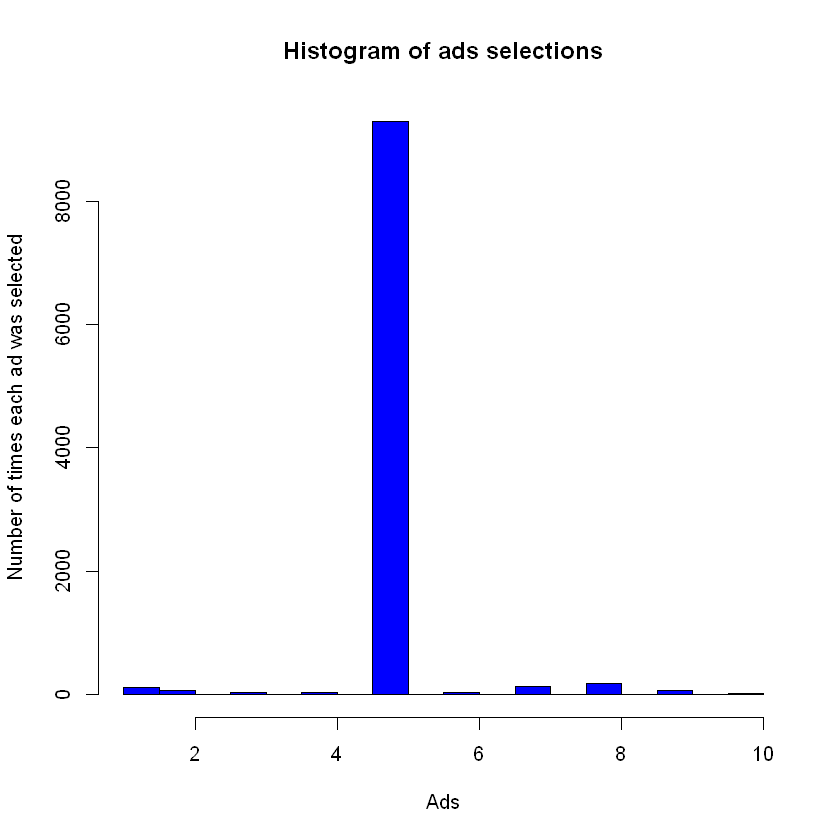

In [5]:

hist(ads_selected,
     col = 'blue',
     main = 'Histogram of ads selections',
     xlab = 'Ads',
     ylab = 'Number of times each ad was selected')